# Joann Chan

______

**We will be using webscraping and NLTK tools to scrape, analyze, and visualize data from a book on project gutenberg.**

**Here we will be taking a look at [*Alice's Adventures in Wonderland*](http://www.gutenberg.org/files/11/11-h/11-h.htm) by Lewis Carol**

______

|  Table of Contents                   |
| -------------------------------------|
| [Webscraping](#webscrape)            |
| [Use NLTK Word Tokenize](#NLTK)      |
| [Lowercase Words](#lower)            |
| [Removing Punctuation](#punctuation) |
| [Stopwords](#stopwords)              |
| [Top 20 Words](#top20)               |
| [Barplot](#barplot)                  |
| [Dispersion Plot](#dispersion)       |
| [Top Bigrams](#bigrams)              |
| [Wordcloud](#wordcloud)              |

____

# Webscraping <a id="webscrape"></a>

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
url = "http://www.gutenberg.org/files/11/11-h/11-h.htm"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

**We know that this url works because we got the following as an output:**

$$<Response [200]>$$

___\*\*\*Note that $<Response [400]>$ would mean that the url resulted in an error___\*\*\*

In [5]:
alice_in_wonderland = BeautifulSoup(response.content, "html.parser")

In [6]:
len(alice_in_wonderland)

6

In [7]:
alice_text = alice_in_wonderland.get_text()

In [8]:
len(alice_text)

187147

**We can see that there are 187147 strings that make up this text**

**Let's take a look at the first 400 strings below**

In [9]:
alice_text[:400]

"\n\n\n\n\n\r\n      Alice's Adventures in Wonderland, by Lewis Carroll\r\n    \n\r\n    <!--\r\n    body { margin:5%; background:#faebd0; text-align:justify}\r\n    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }\r\n    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }\r\n    hr  { width: 50%; text-align: center;}\r\n    .foot { margin-left: 20%; margin-right: 20%; text-ali"

**We can see the first 400 strings, but what we want is to just view the text.**

In [10]:
import re

In [11]:
alice_words = re.findall('\w+', alice_text)

**Here we are trying to isolate all the words**

**To do this, we use the $re.findall$ command**

**Then, we type** \w+, alice_text **into the parenthesis that follows that command**
>**This is telling the program to find all the words within the *Alice's Adventures in Wonderland* book and group them together**

**What we get is the following:**

In [12]:
alice_words [:10]

['Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'body',
 'margin']

In [79]:
len(alice_words)

30803

**Another way to get the above result is to tokenize the text.**

# Use NLTK Word Tokenize <a id="NLTK"></a>

In [13]:
from nltk.tokenize import RegexpTokenizer

In [14]:
tokenizer = RegexpTokenizer('\w+')

In [15]:
alice_tokens = tokenizer.tokenize(alice_text)

In [16]:
alice_tokens [:10]

['Alice',
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 'body',
 'margin']

**We can see that the results are the same as when we used the $re.findall$ command**

# Lowercase Words <a id="lower"></a>

In [43]:
lowered = []
for word in alice_tokens:
    lowered.append(word.lower())

**This command creates an empty list and then takes all the words that we isolated in *Alice's Adventures in Wonderland* and lowercases them.**

In [44]:
lowered[:10]

['alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'body',
 'margin']

In [45]:
len(lowered)

30803

**Here we can see the first 10 words, all lowercased**

# Removing Punctuation <a id="punctuation"></a>

In [20]:
import string

In [210]:
for c in string.punctuation:
    print("["+c+"]")

[!]
["]
[#]
[$]
[%]
[&]
[']
[(]
[)]
[*]
[+]
[,]
[-]
[.]
[/]
[:]
[;]
[<]
[=]
[>]
[?]
[@]
[[]
[\]
[]]
[^]
[_]
[`]
[{]
[|]
[}]
[~]


In [59]:
punctuation = list(string.punctuation)

In [214]:
punctuation[:20]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>']

In [73]:
no_punctuation = [w for w in lowered if not w in punctuation]

In [207]:
no_punctuation[:15]

['alice',
 's',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'body',
 'margin',
 '5',
 'background',
 'faebd0',
 'text',
 'align']

In [75]:
len(no_punctuation)

30803

**It should be noted that I had already removed the punctuation beforehand with the $re.findall$ command in the [Webscraping](#webscrape) section.** 

# Stopwords <a id="stopwords"></a>

In [46]:
from nltk.corpus import stopwords

In [47]:
stop_words = set(stopwords.words('english'))

In [48]:
filter_words = [word for word in lowered if not word in stop_words]

In [49]:
filter_words[:10]

['alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'body',
 'margin',
 '5',
 'background',
 'faebd0']

**You can see that we removed all of the words that do not contribute much meaning to the text, such as *the*, *of*, *this*, etc.**

**This is going to be important for when we look for the top 20 words because it is a gurantee that the top 20 will be one of these stopwords, which means that our top 20 words will just be connectors rather than meaningful words**

# Top 20 Words <a id="top20"></a>

In [50]:
import nltk

In [51]:
text = nltk.Text(filter_words)

In [52]:
text[:15]

['alice',
 'adventures',
 'wonderland',
 'lewis',
 'carroll',
 'body',
 'margin',
 '5',
 'background',
 'faebd0',
 'text',
 'align',
 'justify',
 'p',
 'text']

In [29]:
fdist = nltk.FreqDist(text)

In [30]:
type(fdist)

nltk.probability.FreqDist

In [31]:
top_words = fdist.most_common(20)

In [32]:
top_words 

[('said', 462),
 ('alice', 405),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58)]

**Here we can see the top 20 words, that are NOT stopwords, used in *Alice's Adventures in Wonderland***

**Next to each word is the number of times the word was used within the book**

**Let's break this up into two groups:**

In [194]:
x_top = [top_words[0][0], top_words[1][0], top_words[2][0], top_words[3][0], top_words[4][0], top_words[5][0], top_words[6][0], top_words[7][0], top_words[8][0], top_words[9][0], top_words[10][0], top_words[11][0], top_words[12][0], top_words[13][0], top_words[14][0], top_words[15][0], top_words[16][0], top_words[17][0], top_words[18][0], top_words[19][0]]

In [195]:
x_top

['said',
 'alice',
 'little',
 'one',
 'gutenberg',
 'know',
 'project',
 'like',
 'would',
 'went',
 'could',
 'queen',
 'thought',
 'time',
 'see',
 'well',
 'king',
 'turtle',
 'way',
 'began']

In [201]:
y_top = [top_words[0][1], top_words[1][1], top_words[2][1], top_words[3][1], top_words[4][1], top_words[5][1], top_words[6][1], top_words[7][1], top_words[8][1], top_words[9][1], top_words[10][1], top_words[11][1], top_words[12][1], top_words[13][1], top_words[14][1], top_words[15][1], top_words[16][1], top_words[17][1], top_words[18][1], top_words[19][1]]

In [202]:
y_top

[462,
 405,
 129,
 106,
 93,
 88,
 87,
 85,
 83,
 83,
 78,
 76,
 74,
 71,
 70,
 63,
 63,
 60,
 58,
 58]

**Here you can see that we split up the frequency distribution so that we have a list of the top 20 words and a list of how many times those words were used**

**This will be important when we get to the [Barplot](#barplot) section**

**First, let's plot the frequency distribution:**

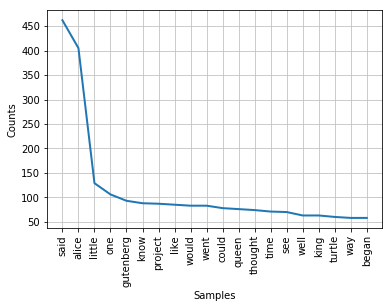

In [33]:
fdist.plot(20)

**On the x-axis we have the top 20 words in order from left to right**

**On the y-axis we have the count, the number of times each word was used**

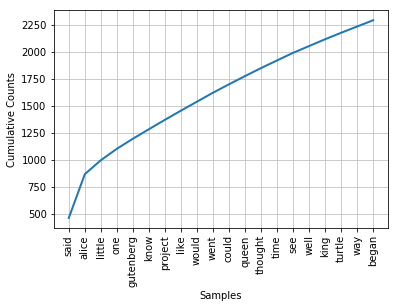

In [34]:
fdist.plot(20, cumulative = True)

**As we go along the line in this plot, we can see how much of the text is contributed by each of these words**

# Barplot <a id="barplot"></a>

Text(0,0.5,'Count')

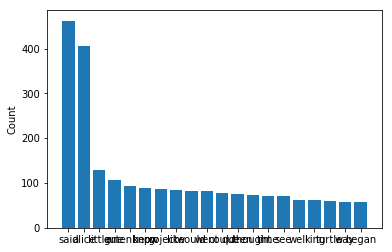

In [205]:
y_pos = np.arange(len(x_top))
plt.bar(y_pos, y_top)
plt.xticks(y_pos, x_top)
plt.ylabel('Count')

**You can see that we took the top 20 words within the book and plotted them on a barplot to see the amount of times each word was used. However, on this graph, it's hard to see the words, so lets try inserting $rotation=90$ after $x__top$ in the line that reads $plt.xticks(y__pos, x__top)$**

Text(0,0.5,'Count')

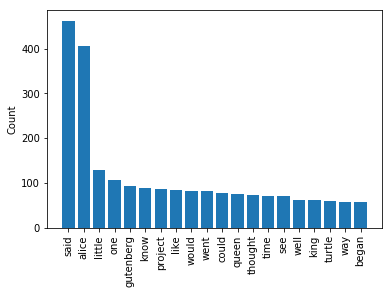

In [206]:
y_pos = np.arange(len(x_top))
plt.bar(y_pos, y_top)
plt.xticks(y_pos, x_top, rotation=90)
plt.ylabel('Count')

**Now we can actually see the words on the barplot**

# Dispersion Plot <a id="dispersion"></a>

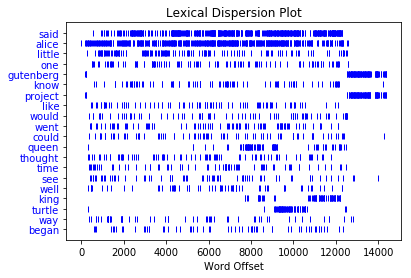

In [36]:
text.dispersion_plot(["said", "alice", 'little', 'one', 'gutenberg', 'know', 'project', 'like', 'would', 'went', 'could', 'queen', 'thought', 'time', 'see', 'well', 'king', 'turtle', 'way', 'began'])

**The dispersion plot shows us where each of these words is located throughout the book. We can see that some words, like "*gutenberg*" and "*project*", occur more at the end of the book, as they should, while others, like "*said*" and "*alice*", are more spread out.**

# Top Bigrams <a id="bigrams"></a>

In [37]:
list(nltk.bigrams(["said", "alice", 'little', 'one', 'gutenberg', 'know', 'project', 'like', 'would', 'went', 'could', 'queen', 'thought', 'time', 'see', 'well', 'king', 'turtle', 'way', 'began']))

[('said', 'alice'),
 ('alice', 'little'),
 ('little', 'one'),
 ('one', 'gutenberg'),
 ('gutenberg', 'know'),
 ('know', 'project'),
 ('project', 'like'),
 ('like', 'would'),
 ('would', 'went'),
 ('went', 'could'),
 ('could', 'queen'),
 ('queen', 'thought'),
 ('thought', 'time'),
 ('time', 'see'),
 ('see', 'well'),
 ('well', 'king'),
 ('king', 'turtle'),
 ('turtle', 'way'),
 ('way', 'began')]

**This is a list of word pairs; bigrams.**

In [38]:
text.collocations()

project gutenberg; mock turtle; march hare; said alice; white rabbit;
literary archive; archive foundation; electronic works; united states;
join dance; gutenberg literary; public domain; soo oop; minute two;
said king; text align; set forth; margin left; pglaf org; beg pardon


**We know that collocations are just frequent bigrams, and one of these collocations is actually a bigram we created above:**

$$('said', 'alice')$$

**This means that "said alice" is a bigram that occurs often throughout the book, which makes sense considering the book is *Alice's Adventures in Wonderland*.**

# Wordcloud <a id="wordcloud"></a>

In [80]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [81]:
wordcloud = WordCloud(background_color = 'black').generate(str(filter_words))

In [82]:
print(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

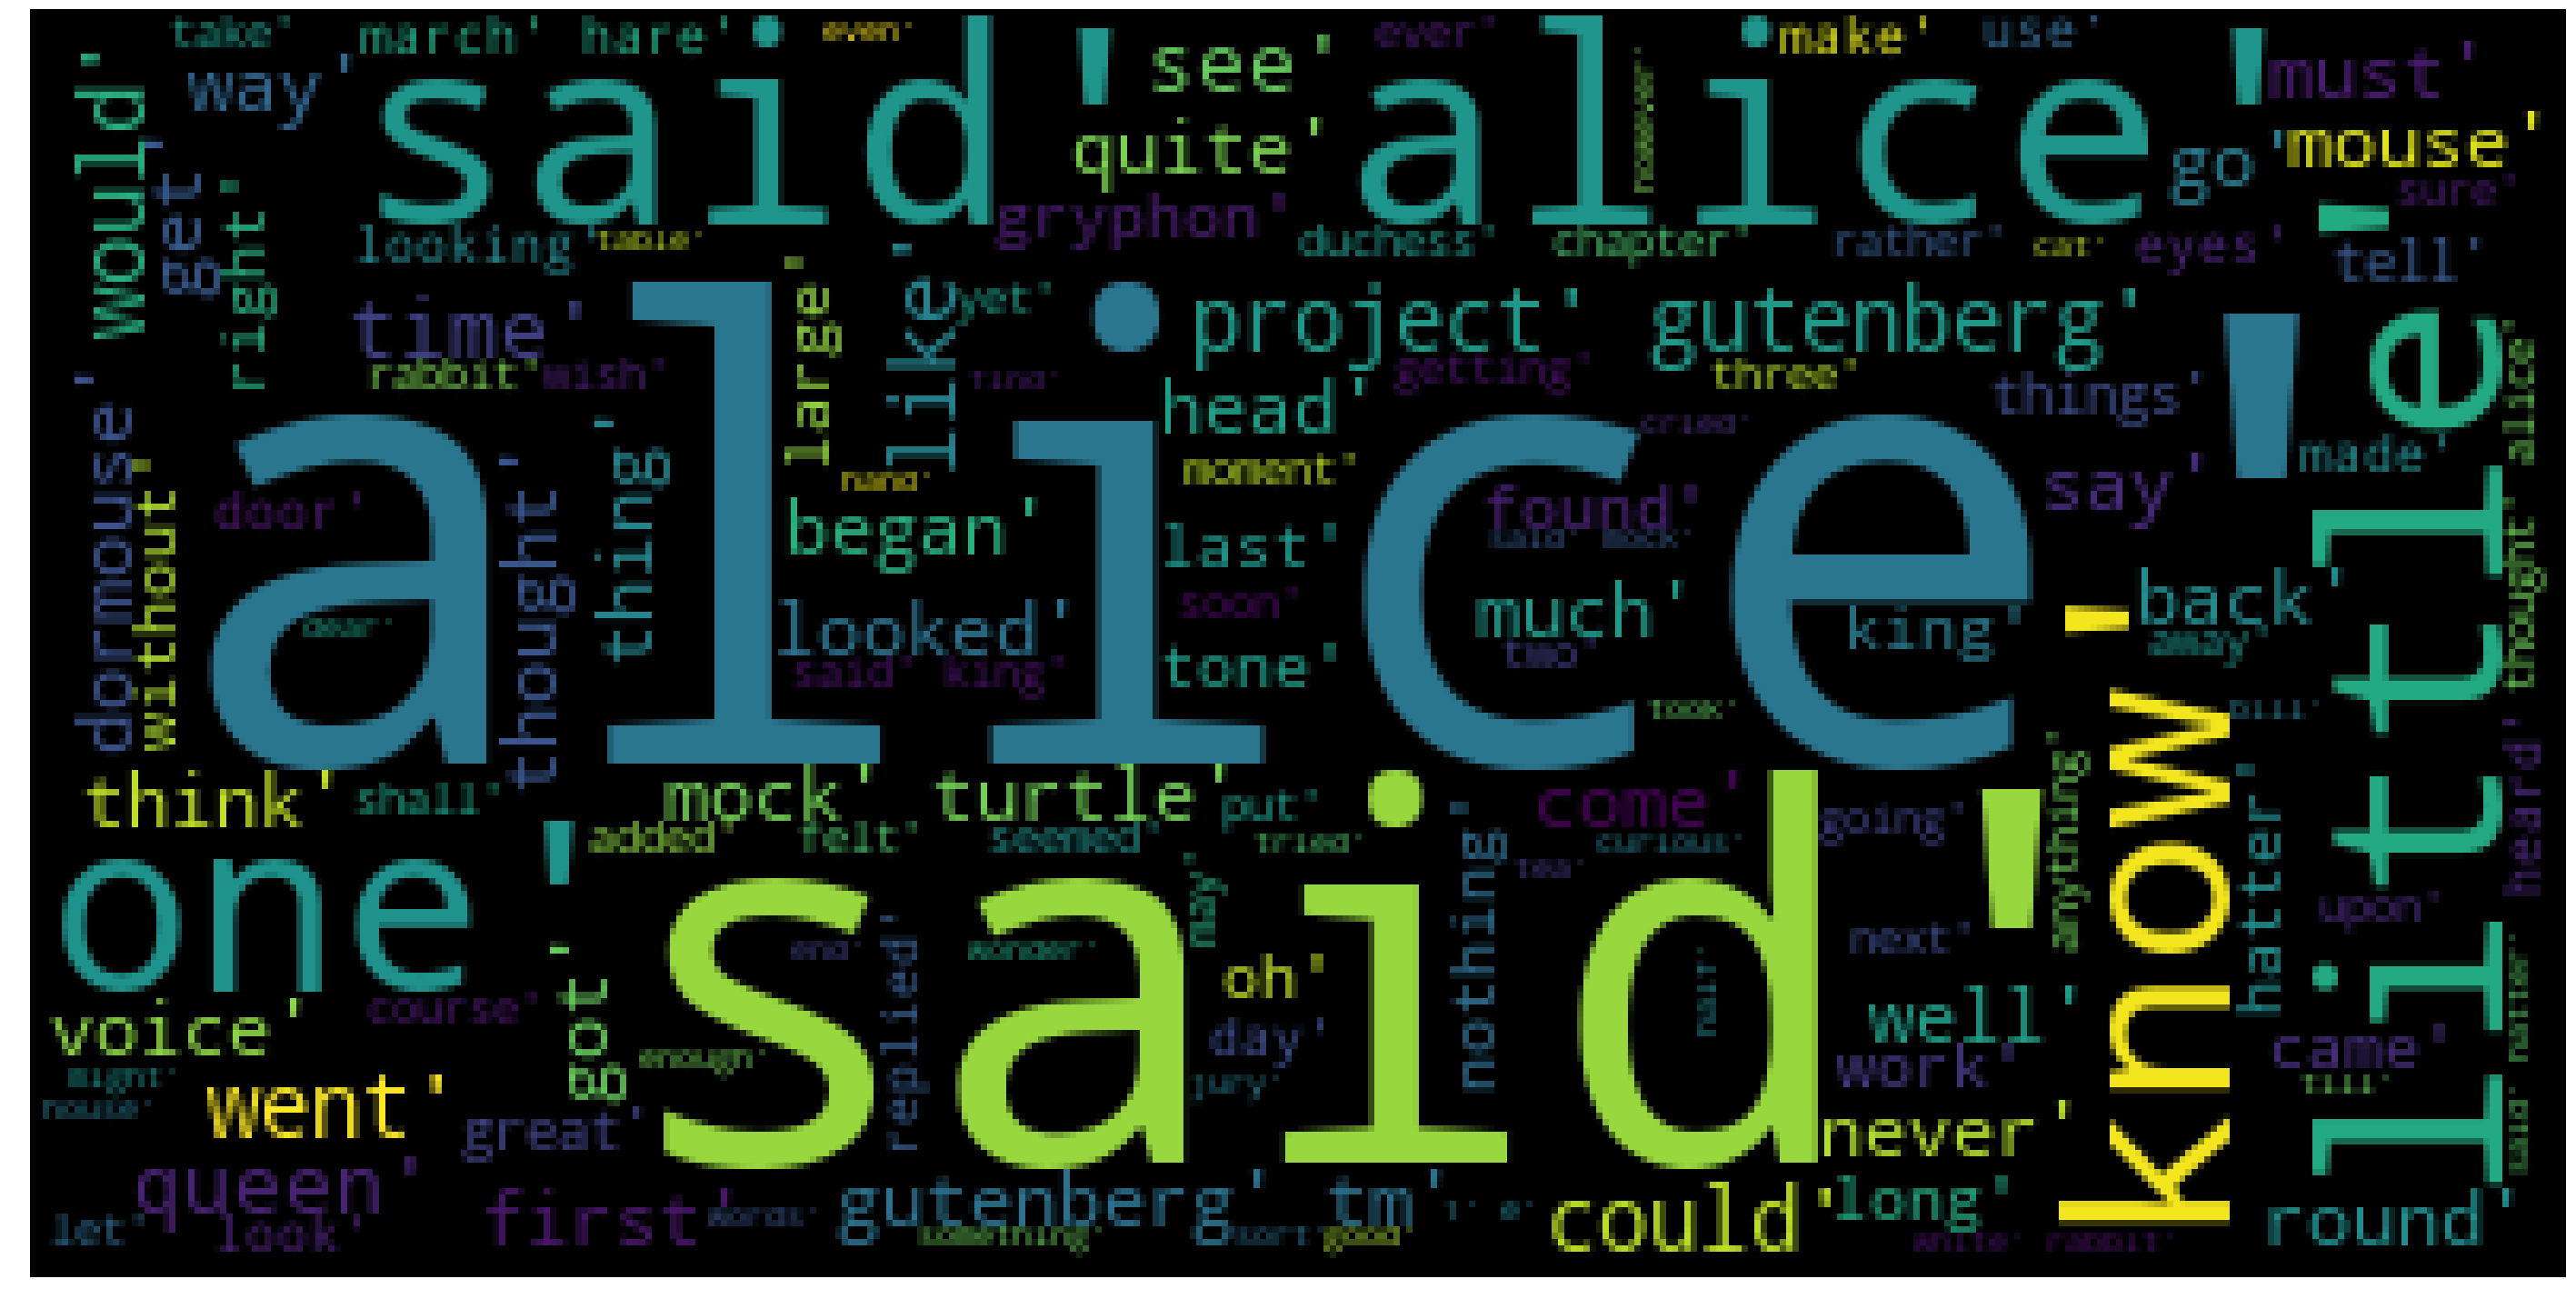

In [83]:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud)
plt.axis('off')